Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the dataframe
df=pd.read_csv('/content/university_enrollment_(Mini-project-01).csv')
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


Setting the index column

In [3]:
df.set_index('course_id',inplace=True)
df.head()

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
course_id,,,,,,,
1,classroom,2018,165,28.14,73.0,Beginner,Science
2,classroom,2020,175,79.68,86.0,NaN,Science
3,online,2016,257,57.24,80.0,NaN,Mathematics
4,online,2013,251,97.67,75.0,Beginner,Technology
5,classroom,2019,165,39.75,76.0,Beginner,Science


Data Collection

In [4]:
df.shape

(1850, 7)

In [5]:
df.dtypes

course_type          object
year                  int64
enrollment_count      int64
pre_score            object
post_score          float64
pre_requirement      object
department           object
dtype: object

Converting the columns pre scores and year to coorect datatype

In [6]:
df['year']=pd.to_datetime(df['year'], format= '%Y')
df.dtypes

course_type                 object
year                datetime64[ns]
enrollment_count             int64
pre_score                   object
post_score                 float64
pre_requirement             object
department                  object
dtype: object

In [7]:
#Eliminating '-' character from column
df[df['pre_score']== '-'].head()

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
course_id,,,,,,,
16,online,2013-01-01,256,-,86.0,NaN,Mathematics
23,online,2015-01-01,236,-,72.0,Intermediate,Mathematics
27,online,2014-01-01,251,-,80.0,NaN,Science
28,online,2016-01-01,251,-,83.0,NaN,Science
32,online,2013-01-01,261,-,96.0,NaN,Technology


In [8]:
df['pre_score']=pd.to_numeric(df['pre_score'],errors='coerce')

In [9]:
mean_pre_score=df.groupby('course_type')['pre_score'].transform('mean')

In [10]:
mean_pre_score


course_id
1       50.403529
2       50.403529
3       49.224280
4       49.224280
5       50.403529
          ...    
1846    50.403529
1847    49.224280
1848    49.224280
1849    49.224280
1850    49.224280
Name: pre_score, Length: 1850, dtype: float64

In [11]:
# checking missing values
df.isnull().sum()

course_type           0
year                  0
enrollment_count      0
pre_score           130
post_score          185
pre_requirement     891
department            0
dtype: int64

In [12]:
# filling the missing values 'pre-score' with the calculated mean
df['pre_score']=df['pre_score'].fillna(mean_pre_score)

In [13]:
df['pre_score']=df['pre_score'].astype(float)


In [14]:
df.isnull().sum()

course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

Checking categorical columns

In [15]:
df['department'].value_counts()

department
Technology     719
Science        472
Mathematics    220
Math           220
Engineering    219
Name: count, dtype: int64

In [16]:
# replacing math by mathematics overcoming the anomaly
df['department']=df['department'].replace('Math','Mathematics')


In [17]:
df['department'].value_counts()

department
Technology     719
Science        472
Mathematics    440
Engineering    219
Name: count, dtype: int64

In [18]:
df['course_type'].value_counts()

course_type
online       1375
classroom     475
Name: count, dtype: int64

In [19]:
df['department'].value_counts()


department
Technology     719
Science        472
Mathematics    440
Engineering    219
Name: count, dtype: int64

In [20]:
df['pre_requirement'].value_counts()

pre_requirement
Beginner        654
Intermediate    305
Name: count, dtype: int64

Data Cleaning

In [21]:
# checking missing values
df.isnull().sum()

course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

In [22]:
# handling post_scores
mean_post_score = df.groupby('course_type')['post_score'].transform('mean')


In [23]:
df['post_score'] = df['post_score'].fillna(mean_post_score)


In [24]:
df.isnull().sum()

course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score            0
pre_requirement     891
department            0
dtype: int64

Handling missing values of pre_requirement

In [25]:
prerequisite_counts = df.groupby('course_type')['pre_requirement'].value_counts(dropna=False).unstack(fill_value=0)


In [26]:
prerequisite_counts


pre_requirement,Beginner,Intermediate,NaN
course_type,,,
classroom,192,171,112
online,462,134,779


In [27]:
# make dict for each course type
ratios={
       'classroom':{'Beginner':192,'Intermediate':171,'NaN':112},
        'online':{'Beginner':462,'Intermediate':134,'NaN':779}
        }

In [28]:
# Calculate the number of missing values to fill for each department
for course_type, ratio in ratios.items():
    if course_type in df['course_type'].values:
        num_missing = df[(df['course_type'] == course_type) & (df['pre_requirement'].isna())].shape[0]
        total_ratio = ratio['Beginner'] + ratio['Intermediate']
        num_beginner = int(num_missing * (ratio['Beginner'] / total_ratio))
        num_intermediate = num_missing - num_beginner

        # Fill missing values
        df.loc[(df['course_type'] == course_type) & (df['pre_requirement'].isna()), 'pre_requirement'] = (
            ['Beginner'] * num_beginner + ['Intermediate'] * num_intermediate
        )

In [29]:
prerequisite_counts2 = df.groupby('course_type')['pre_requirement'].value_counts(dropna=False).unstack(fill_value=0)
prerequisite_counts2

pre_requirement,Beginner,Intermediate
course_type,,
classroom,251,224
online,1065,310


In [30]:
df.isnull().sum()

course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

Data Visualization

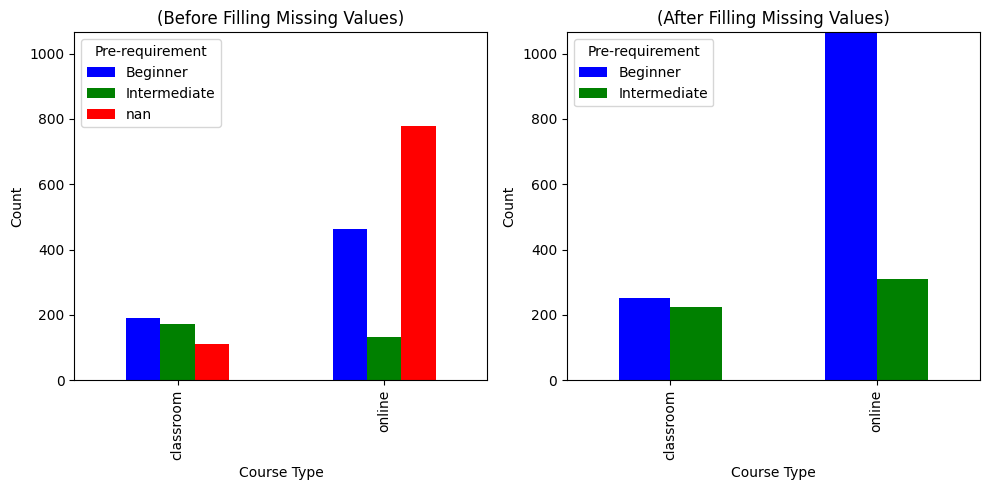

In [31]:
# plotting histogram to compare the data
fig , axes = plt.subplots(1,2,figsize=(10, 5))
# first histogram(before filling the missing values)
prerequisite_counts.plot(kind='bar', ax=axes[0], color=['b', 'g', 'r'])
axes[0].set_xlabel('Course Type')
axes[0].set_ylabel('Count')
axes[0].set_title('(Before Filling Missing Values)')
axes[0].legend(title='Pre-requirement')

# Second histogram (after filling missing values)
prerequisite_counts2.plot(kind='bar', ax=axes[1], color=['b', 'g'])
axes[1].set_xlabel('Course Type')
axes[1].set_ylabel('Count')
axes[1].set_title('(After Filling Missing Values)')
axes[1].legend(title='Pre-requirement')

# Set the y-axis limits to be the same for both plots
y_max = max(prerequisite_counts.max().max(), prerequisite_counts2.max().max())
axes[0].set_ylim(0, y_max)
axes[1].set_ylim(0, y_max)

plt.tight_layout()
plt.show()

In [32]:
#save the cleaned data
df.to_csv('cleaned_data.csv', index=False)
df.head()

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
course_id,,,,,,,
1,classroom,2018-01-01,165,28.14,73.0,Beginner,Science
2,classroom,2020-01-01,175,79.68,86.0,Beginner,Science
3,online,2016-01-01,257,57.24,80.0,Beginner,Mathematics
4,online,2013-01-01,251,97.67,75.0,Beginner,Technology
5,classroom,2019-01-01,165,39.75,76.0,Beginner,Science


Data Analysis

In [33]:
#subset the dataframe for the course_type
classroom_df = df[df['course_type'] == 'classroom']
online_df = df[df['course_type'] == 'online']

In [34]:
classroom_df.head()

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
course_id,,,,,,,
1,classroom,2018-01-01,165,28.14,73.0,Beginner,Science
2,classroom,2020-01-01,175,79.68,86.0,Beginner,Science
5,classroom,2019-01-01,165,39.75,76.0,Beginner,Science
10,classroom,2016-01-01,180,83.53,79.0,Beginner,Engineering
11,classroom,2022-01-01,180,9.84,74.0,Beginner,Engineering


In [35]:
online_df.head()

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
course_id,,,,,,,
3,online,2016-01-01,257,57.24,80.0,Beginner,Mathematics
4,online,2013-01-01,251,97.67,75.0,Beginner,Technology
6,online,2014-01-01,246,50.10,76.0,Beginner,Mathematics
7,online,2021-01-01,241,87.83,84.0,Beginner,Science
8,online,2018-01-01,261,76.48,88.0,Beginner,Technology


Visualizing enrollment trends over the years

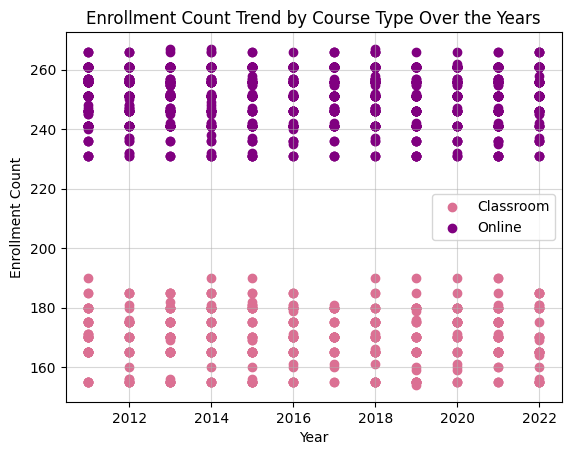

In [36]:
plt.scatter(classroom_df['year'],classroom_df['enrollment_count'], label='Classroom', color= 'palevioletred')
plt.scatter(online_df['year'],online_df['enrollment_count'], label='Online', color= 'purple')
plt.xlabel('Year')
plt.ylabel('Enrollment Count')
plt.title('Enrollment Count Trend by Course Type Over the Years')
plt.legend()

plt.grid(True,alpha=0.5)
plt.show()


In [37]:
# Group by department and year, summing up the enrollment counts
classroom_grouped = classroom_df.groupby(['department', classroom_df['year'].dt.year])['enrollment_count'].sum().unstack()
online_grouped = online_df.groupby(['department', online_df['year'].dt.year])['enrollment_count'].sum().unstack()

In [38]:
classroom_grouped.head()

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
department,,,,,,,,,,,,
Engineering,2101,680,2090,2610,1761,1570,2091,1420,2120,1780,2281,1421
Mathematics,872,861,871,2261,1762,2083,1711,842,1198,1171,1041,850
Science,2960,2778,2601,2125,2911,2125,1485,2426,2910,1825,2505,2405
Technology,720,1770,2100,1595,720,1410,350,1575,855,1060,1030,1265


In [39]:
# Normalize data using Pandas
classroom_normalized = (classroom_grouped-classroom_grouped.min())/(classroom_grouped.max()-classroom_grouped.min())
online_normalized = (online_grouped-online_grouped.min())/(online_grouped.max()-online_grouped.min())

In [40]:
online_normalized.head()

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
department,,,,,,,,,,,,
Engineering,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mathematics,0.452547,0.542761,0.624907,0.433408,0.283734,0.410873,0.330677,0.525027,0.536670,0.458057,0.481481,0.412388
Science,0.391259,0.318784,0.515370,0.268010,0.492614,0.469549,0.208386,0.194598,0.476273,0.146623,0.359477,0.255219
Technology,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Plotting normalize counts of both online and classroom

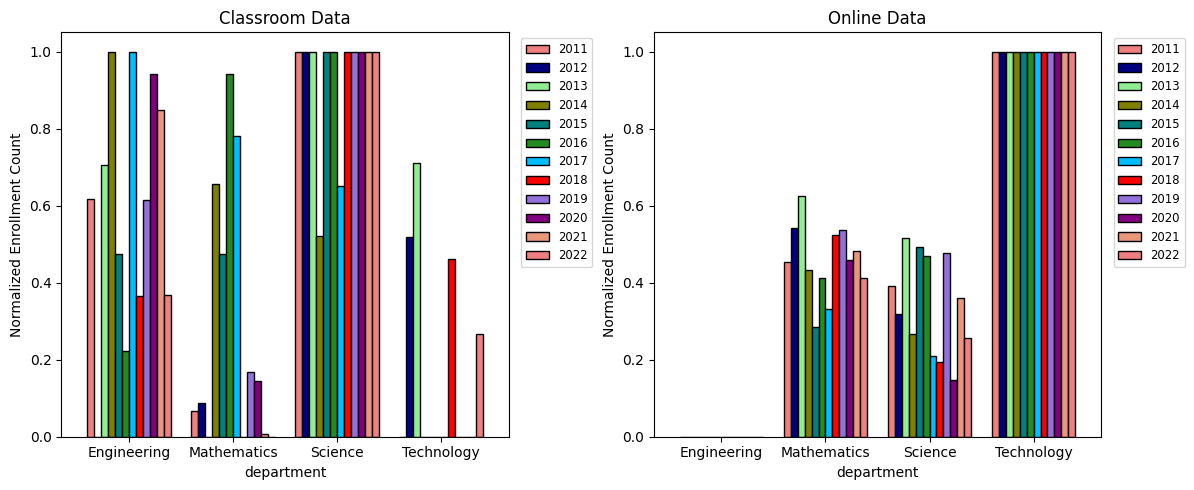

In [41]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
colors = ['lightcoral', 'navy', 'lightgreen', 'olive', 'teal', 'forestgreen', 'deepskyblue','red', 'mediumpurple', 'purple', 'darksalmon']

# Plot for classroom data
classroom_normalized.plot(kind='bar', ax=ax1, width=0.8,
                                  edgecolor='black', color = colors)
ax1.set_title('Classroom Data')
ax1.set_ylabel('Normalized Enrollment Count')
ax1.set_xticklabels(classroom_normalized.index, rotation=0)  # Adjust x tick labels with rotation

# Plot for online data
online_normalized.plot(kind='bar', ax=ax2, width=0.8,
                               edgecolor='black', color = colors)
ax2.set_title('Online Data')
ax2.set_ylabel('Normalized Enrollment Count')
ax2.set_xticklabels(online_normalized.index, rotation=0)  # Adjust x tick labels with rotation


# Customize legend size and rotation
ax1.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.2, 1))
ax2.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.2, 1))


plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

Pre_Score and Post_Score Comparision

In [43]:
#Aggregate by department for classroom df
classroom_mean_score= classroom_df.groupby('department')[['pre_score','post_score']].mean()
#Aggregate by department for online df
online_mean_score= online_df.groupby('department')[['pre_score','post_score']].mean()

In [44]:
classroom_mean_score

,pre_score,post_score
department,,
Engineering,54.706146,75.395692
Mathematics,49.687641,74.850816
Science,48.230816,75.373890
Technology,49.346772,75.571806


In [45]:
online_mean_score

,pre_score,post_score
department,,
Engineering,46.179954,74.858156
Mathematics,48.213183,74.950000
Science,49.921001,74.928571
Technology,49.907506,75.441130


After grouped df we need plot bar charts to see pre score post score for each departments


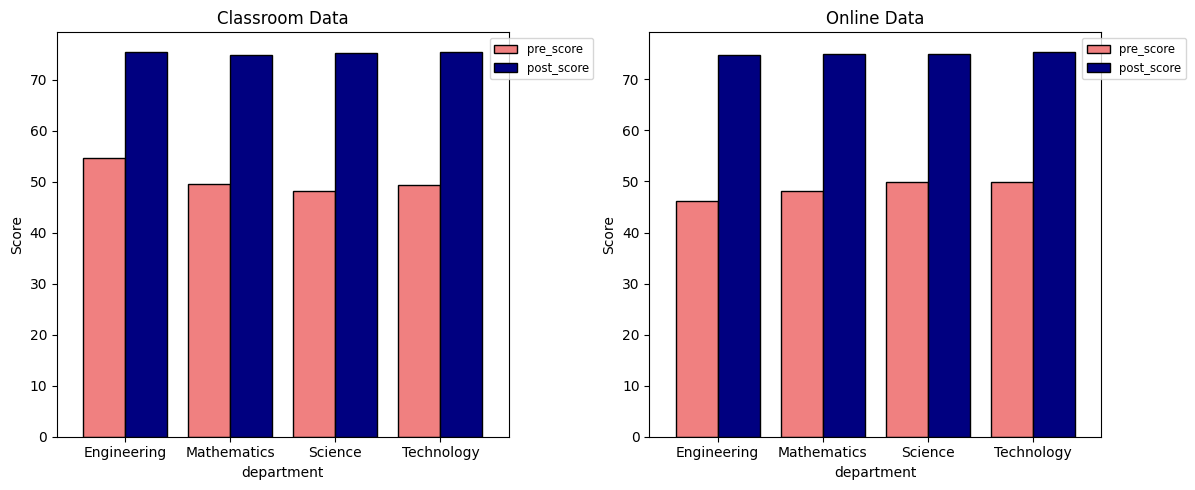

In [46]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Plot for classroom data
classroom_mean_score.plot(kind='bar', ax=ax1, width=0.8, edgecolor='black', color=colors)
ax1.set_title('Classroom Data')
ax1.set_ylabel('Score')
ax1.set_xticklabels(classroom_mean_score.index, rotation=0)  # Adjust x tick labels with rotation

online_mean_score.plot(kind='bar', ax=ax2, width=0.8, edgecolor='black', color=colors)
ax2.set_title('Online Data')
ax2.set_ylabel('Score')
ax2.set_xticklabels(online_mean_score.index, rotation=0)  # Adjust x tick labels with rotation

# Customize legend size and rotation
ax1.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.2, 1))
ax2.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.2, 1))


plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

visualizing beginners and intermediate level courses availibility in every department

In [47]:
# subset all entries with course_type = clasroom and pre_requirement = Beginner
beginner_classroom_data = classroom_df[classroom_df['pre_requirement'] == 'Beginner']
beginner_counts_classroom = beginner_classroom_data['department'].value_counts(normalize=True) * 100
beginner_counts_classroom.head()

department
Science        36.254980
Engineering    21.513944
Mathematics    21.513944
Technology     20.717131
Name: proportion, dtype: float64

In [50]:
intermediate_classroom_data = classroom_df[classroom_df['pre_requirement'] == 'Intermediate']
intermediate_counts_classroom = intermediate_classroom_data['department'].value_counts(normalize=True) * 100
intermediate_counts_classroom.head()

department
Science        38.839286
Engineering    31.696429
Mathematics    16.071429
Technology     13.392857
Name: proportion, dtype: float64

In [48]:
# subset all entries with course_type= online and pre_requirement = Beginner
beginner_online_data = online_df[online_df['pre_requirement'] == 'Beginner']
beginner_counts_online = beginner_online_data['department'].value_counts(normalize=True) * 100
beginner_counts_online.head()

department
Technology     49.671362
Mathematics    24.037559
Science        20.281690
Engineering     6.009390
Name: proportion, dtype: float64

In [52]:
intermediate_online_data = online_df[online_df['pre_requirement'] == 'Intermediate']
intermediate_counts_online = intermediate_online_data['department'].value_counts(normalize=True) * 100
intermediate_counts_online.head()

department
Technology     34.838710
Mathematics    30.322581
Science        25.161290
Engineering     9.677419
Name: proportion, dtype: float64

In [53]:
department_colors = {
    'Science': 'plum',
    'Engineering': 'lightskyblue',
    'Mathematics': 'peachpuff',
    'Technology': 'pink'
}

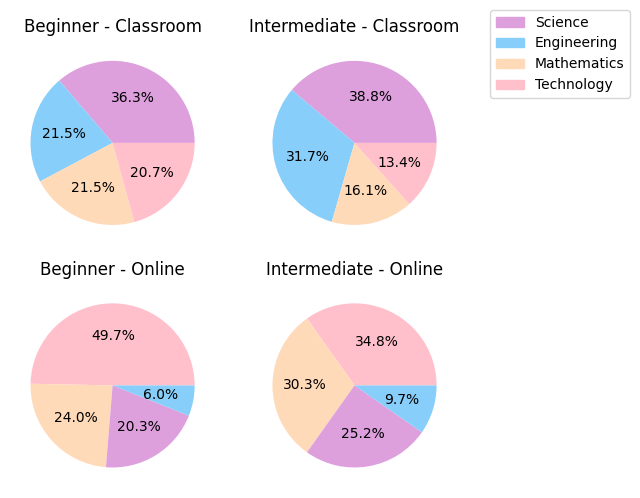

In [54]:
# create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(5, 5))

# Plot for beginner - Classroom
ax1.pie(beginner_counts_classroom, autopct='%1.1f%%',
        colors=[department_colors.get(dep, 'gray') for dep in beginner_counts_classroom.index])
ax1.set_title('Beginner - Classroom')

# Plot for intermediate - Classroom
ax2.pie(intermediate_counts_classroom, autopct='%1.1f%%',
        colors=[department_colors.get(dep, 'gray') for dep in intermediate_counts_classroom.index])
ax2.set_title('Intermediate - Classroom')

# Plot for beginner - Online
ax3.pie(beginner_counts_online, autopct='%1.1f%%',
        colors=[department_colors.get(dep, 'gray') for dep in beginner_counts_online.index])
ax3.set_title('Beginner - Online')

# Plot for intermediate - Online
ax4.pie(intermediate_counts_online, autopct='%1.1f%%',
        colors=[department_colors.get(dep, 'gray') for dep in intermediate_counts_online.index])
ax4.set_title('Intermediate - Online')

# Create a single legend for all plots
handles = [plt.Rectangle((0,0),1,1, color=department_colors.get(dep, 'gray')) for dep in department_colors]
labels = list(department_colors.keys())
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Conclusion

Over the years from 2011 to 2022 the enrollment in online courses is more than the enrollment in classroom courses. More students are getting enrolled for online courses.
The courses in the department of Technology and Mathematics are mostly being studied online.
Whereas courses of department Science and Engineering and mostly being enrolled by the students who want to learn on-campus.
One more key insight is that university is offering more online courses for technology and maths. That can be a reason of the high enrollment of students in online courses for these departments